In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset

import pandas
import matplotlib.pyplot as plt

## Part 1-1

In [ ]:
x=torch.tensor(3.5)
x

tensor(3.5000)

In [ ]:
y=3
x+y

tensor(6.5000)

In [ ]:
x=torch.tensor(3.5, requires_grad=True)
x

tensor(3.5000, requires_grad=True)

In [ ]:
y=(x-1)*(x-2)*(x-3)
y

tensor(1.8750, grad_fn=<MulBackward0>)

In [ ]:
# 기울기
y.backward()

In [ ]:
x.grad

tensor(5.7500)

In [ ]:
x=torch.tensor(3.5, requires_grad=True)
y=x*x
z=2*y+3

In [ ]:
z.backward()

In [ ]:
x.grad

tensor(14.)

In [ ]:
a=torch.tensor(2.0, requires_grad=True)
b=torch.tensor(1.0, requires_grad=True)

x=2*a+3*b
y=5*a*a + 3*b*b*b
z=2*x+3*y

In [ ]:
z.backward()

In [ ]:
a.grad

tensor(64.)

In [ ]:
b.grad

tensor(33.)

## Part 1-2, 3

In [ ]:
from google.colab import drive
drive.mount('./mount')

Mounted at ./mount


In [ ]:
import pandas

In [ ]:
df=pandas.read_csv("mount/My Drive/Colab Notebooks/data_gan/mnist_train.csv", header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,147,252,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, 0 to 784
dtypes: int64(785)
memory usage: 359.3 MB


In [ ]:
import matplotlib.pyplot as plt

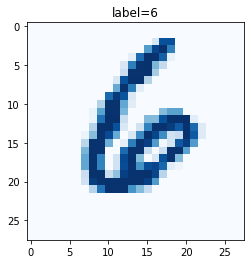

In [ ]:
row=13
data=df.iloc[row]

label=data[0]

img=data[1:].values.reshape(28, 28)
plt.title("label="+str(label))
plt.imshow(img, interpolation='none', cmap='Blues')
plt.show()

In [ ]:
import torch.nn as nn

In [ ]:
class Classifier(nn.Module):
    def __init__(self):
        # initialise parent pytorch class
        super().__init__()
        
        # define neural network layers
        self.model = nn.Sequential(
            nn.Linear(784, 200),
            #nn.Sigmoid(),
            nn.LeakyReLU(0.02),

            nn.LayerNorm(200),
            
            nn.Linear(200, 10),
            nn.Sigmoid()
            #nn.LeakyReLU(0.02)
        )
        
        # create loss function
        self.loss_function = nn.BCELoss()
        #self.loss_function = nn.MSELoss()

        # create optimiser, using simple stochastic gradient descent
        #self.optimiser = torch.optim.SGD(self.parameters(), lr=0.01)
        self.optimiser = torch.optim.Adam(self.parameters())

        # counter and accumulator for progress
        self.counter = 0
        self.progress = []

        pass
    
    
    def forward(self, inputs):
        # simply run model
        return self.model(inputs)
    
    
    def train(self, inputs, targets):
        # calculate the output of the network
        outputs = self.forward(inputs)
        
        # calculate loss
        loss = self.loss_function(outputs, targets)

        # increase counter and accumulate error every 10
        self.counter += 1
        if (self.counter % 10 == 0):
            self.progress.append(loss.item())
            pass
        if (self.counter % 10000 == 0):
            print("counter = ", self.counter)
            pass

        # zero gradients, perform a backward pass, and update the weights
        self.optimiser.zero_grad()
        loss.backward()
        self.optimiser.step()

        pass
    
    
    def plot_progress(self):
        df = pandas.DataFrame(self.progress, columns=['loss'])
        df.plot(ylim=(0, 1.0), figsize=(16,8), alpha=0.1, marker='.', grid=True, yticks=(0, 0.25, 0.5))
        pass
    
    pass

In [ ]:
from torch.utils.data import Dataset

In [ ]:
class MnistDataset(Dataset):

  def __init__(self, csv_file):
    self.data_df=pandas.read_csv(csv_file, header=None)
    pass
  
  def __len__(self):
    return len(self.data_df)

  def __getitem__(self, index):
    # 이미지 목표
    label=self.data_df.iloc[index, 0]
    target=torch.zeros((10))
    target[label]=1.0

    # 0-255의 이미지를 0-1로 정규화
    image_values=torch.FloatTensor(self.data_df.iloc[index, 1:].values)

    # 레이블, 이미지 데이터 텐서, 목표 텐서 반환
    return label, image_values, target

  def plot_image(self, index):
    img=self.data_df.iloc[index, 1:].values.reshape(28, 28)
    plt.title("label="+str(self.data_df.iloc[index, 0]))
    plt.imshow(img, interpolation="none", cmap="Blues")
    pass
  pass


In [ ]:
mnist_dataset=MnistDataset("mount/My Drive/Colab Notebooks/data_gan/mnist_train.csv")

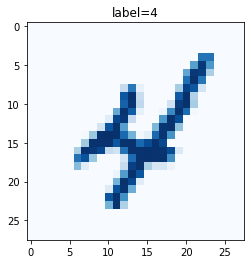

In [ ]:
mnist_dataset.plot_image(9)

In [ ]:
%%time 
# create neural network

C = Classifier()

# train network on MNIST data set

epochs = 3

for i in range(epochs):
    print('training epoch', i+1, "of", epochs)
    for label, image_data_tensor, target_tensor in mnist_dataset:
        C.train(image_data_tensor, target_tensor)
        pass
    pass

training epoch 1 of 3
counter =  10000
counter =  20000
counter =  30000
counter =  40000
counter =  50000
counter =  60000
training epoch 2 of 3
counter =  70000
counter =  80000
counter =  90000
counter =  100000
counter =  110000
counter =  120000
training epoch 3 of 3
counter =  130000
counter =  140000
counter =  150000
counter =  160000
counter =  170000
counter =  180000
CPU times: user 10min 38s, sys: 5.67 s, total: 10min 44s
Wall time: 10min 43s


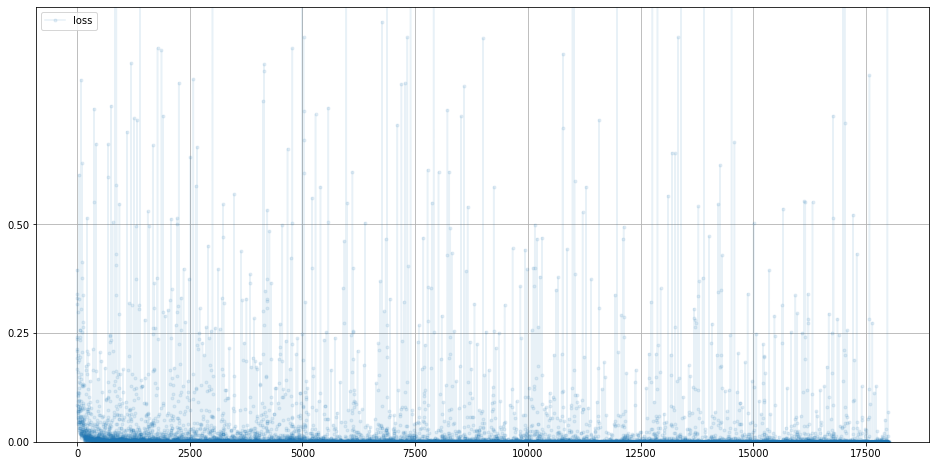

In [ ]:
C.plot_progress()

In [ ]:
mnist_test_dataset=MnistDataset("mount/My Drive/Colab Notebooks/data_gan/mnist_test.csv")

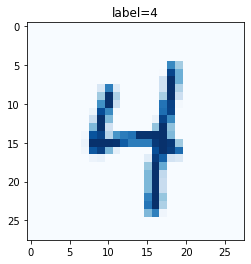

In [ ]:
record=19
mnist_test_dataset.plot_image(record)

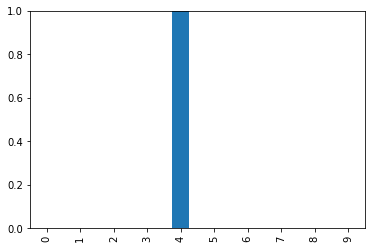

In [ ]:
image_data=mnist_test_dataset[record][1]

# 훈련된 신경망으로부터 쿼리
output=C.forward(image_data)

# 텐서 출력
pandas.DataFrame(output.detach().numpy()).plot(kind='bar', legend=False, ylim=(0,1))

In [ ]:
# test trained neural network on training data

score = 0
items = 0

for label, image_data_tensor, target_tensor in mnist_test_dataset:
    answer = C.forward(image_data_tensor).detach().numpy()
    if (answer.argmax() == label):
        score += 1
        pass
    items += 1
    
    pass

print(score, items, score/items)

9713 10000 0.9713
